In [23]:
from keras import models 
from keras import layers 

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

In [12]:
train_labels[1]

0

In [13]:
network = models.Sequential() 
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) 
network.add(layers.Dense(10, activation='softmax'))
 
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy']) 

In [14]:
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255 

In [15]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels) 

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128) 

Epoch 1/5
60000/60000 [==============================] - 4s - loss: 0.2505 - acc: 0.9276     
Epoch 2/5
60000/60000 [==============================] - 3s - loss: 0.1018 - acc: 0.9698     
Epoch 3/5
60000/60000 [==============================] - 3s - loss: 0.0681 - acc: 0.9796     
Epoch 4/5
60000/60000 [==============================] - 3s - loss: 0.0494 - acc: 0.9853     
Epoch 5/5
60000/60000 [==============================] - 3s - loss: 0.0373 - acc: 0.9884     


In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels) 
print('test_acc:', test_acc)  

 8864/10000 [=========================>....] - ETA: 0stest_acc: 0.9795


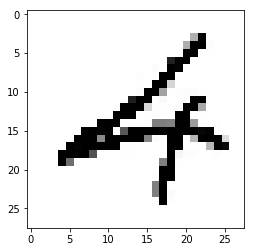

(1, 784)


array([[  7.96644706e-09,   1.86134557e-08,   7.92002797e-01,
          9.22283562e-06,   1.91364005e-01,   2.40110585e-05,
          1.65793784e-02,   2.05578326e-05,   1.35751312e-08,
          8.40915046e-11]], dtype=float32)

In [22]:
img_path = 'c:\\Users\\m.hron\\Source\\Repos\\BrownBags\\BB2-ML-Intro\\HelloWorld-Digits\\data\\4.jpg'
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(28, 28), grayscale=True)

digit = img
import matplotlib.pyplot as pyplot 
pyplot.imshow(digit, cmap=pyplot.cm.binary) 
pyplot.show() 

img_tensor = image.img_to_array(img)
img_tensor = img_tensor.reshape(28 * 28)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor /= 255.


print(img_tensor.shape)
network.predict(img_tensor)